
# Lecture 06 - Matplotlib tutorial

This notebook provides an introduction to the pyplot interface. This is adapted from the [matplotlib.org tutorial][1].

[1]: https://matplotlib.org/tutorials/index.html

#### Intro to pyplot

The module `matplotlib.pyplot` is a [collection of command-style functions][2] that make matplotlib work like the data plotting routines in MATLAB.

[2]: https://matplotlib.org/api/pyplot_summary.html

Each `pyplot` function makes some change to a figure: for example, creates a figure, creates a plotting area
in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

Generating visualizations with pyplot is very quick:

In [1]:
# 
# USE THIS COMMAND TO BE CERTAIN THAT YOUR PLOTS APPEAR IN THE NOTBOOK AS A STATIC IMAGE
# RIGHT AFTER THE CELL WHERE YOU CREATE THE PLOT
# I LIKE TO USE plot.close() AT THE END OF EACH PLOT THAT I MAKE THIS WAY.
%matplotlib inline
#
# USE THIS COMMAND (MAY NOT WORK FOR YOU DEPENDING ON WHETHER ALL THE RIGHT MODULES ARE INSTALLED) 
# TO GET AN INTERACTIVE PLOT (WITH ZOOMING) INSTEAD.
# YOU MUST 'CLOSE' THE PLOT BY CLICKING THE 'POWER' BUTTON BEFORE YOU CAN WRITE ANY MORE CODE.
# DO NOT USE plot.close()!
#%matplotlib notebook 

import numpy                     # numpy functions must be used like `numpy.function`
import matplotlib.pyplot as plot # matplotlib funcitons must be used like `plot.function`

<class 'matplotlib.figure.Figure'>


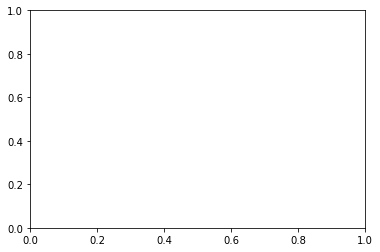

In [2]:
fig,axis=plot.subplots()
print(type(fig))

In [4]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
print(type(one_tick))

<class 'matplotlib.axis.YTick'>


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

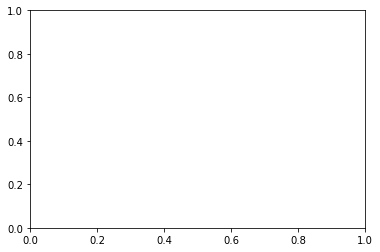

In [3]:
plot.close()
plot.subplots()

In [4]:
plot.close()

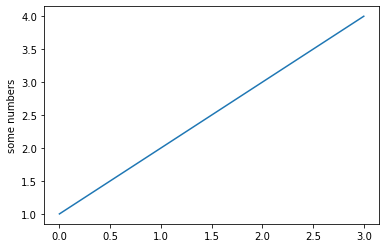

In [6]:
plot.plot([1, 2, 3, 4])
plot.ylabel('some numbers')
plot.show()
plot.close()

If you provide a single list or array to the `matplotlib.pyplot.plot` command, matplotlib assumes it is a
sequence of $y$ values, and automatically generates the $x$ values for you. Since python ranges start with 0, the default $x$ vector has the same length as $y$ but starts with 0.  Hence the $x$ data are ``[0,1,2,3]``.


To plot your $x$ data versus $y$ data, you can issue the command:

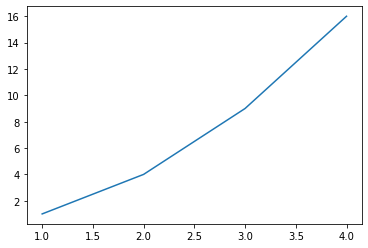

In [7]:
plot.plot([1, 2, 3, 4], [1, 4, 9, 16])
plot.show()
plot.close()

#### Matplotlib variables?

The `pyplot` interface is [state-based][1]. This means that you do not need to hold the information about the plot in a varaible, python will remember it for you. Just calling `matplotlib.pyplot.something` does something to the current plot, or, if there is no plot yet, it creates a new one and then does something to it. This is why I like to use:
```python
plot.show()
plot.close()
``` 
[1]: https://en.wikipedia.org/wiki/State_(computer_science)

I know then that the current plot is closed, and the next `plot` command will open a new one. 

However, you can hold the information about more than one plot in different varaible if you want, and then can use it later.

<div class="alert alert-block alert-info">
<b>Remember:</b> In this notebook, `plot` is a nickname for `matplotlib.pyplot`.
</div>

#### Formatting the style of your plot

For every $x,y$ pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The default format string is `b-`, which is a solid blue line.  For
example, to plot the above with red circles, you would use `ro`.

See the `matplotlib.pyplot.plot` documentation for a complete list of line styles and format strings. The `matplotlib.pyplot.axis` command takes a list of `[xmin, xmax, ymin, ymax]` and specifies the viewport of the axes.

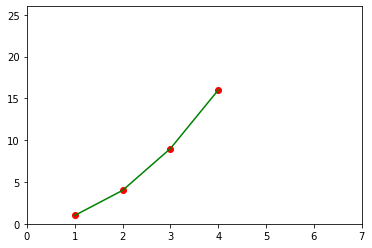

In [8]:
x=[1, 2, 3, 4]
y=[1, 4, 9, 16]
plot.plot(x, y, 'ro')
plot.plot(x, y, 'g-')
plot.axis([0, 7, 0, 26])
plot.show()
plot.close()

Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. 

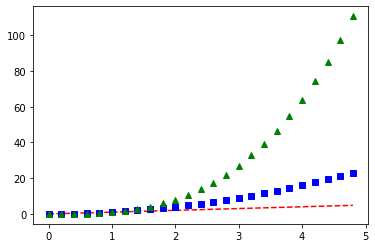

In [9]:
# evenly sampled data
t = numpy.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plot.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plot.show()
plot.close()

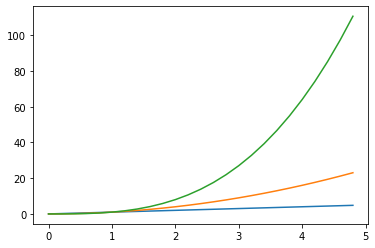

In [10]:
# evenly sampled data
t = numpy.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plot.plot(t, t, t, t**2, t, t**3)
plot.show()
plot.close()

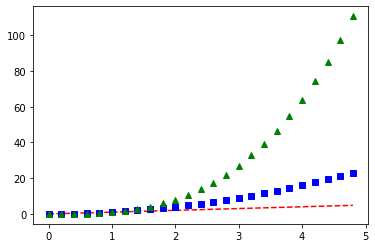

In [11]:
# red dashes, blue squares and green triangles
plot.plot(t, t, 'r--')
plot.plot(t, t**2, 'bs')
plot.plot(t, t**3, 'g^')
plot.show()
plot.close()

#### Plotting with categorical variables

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

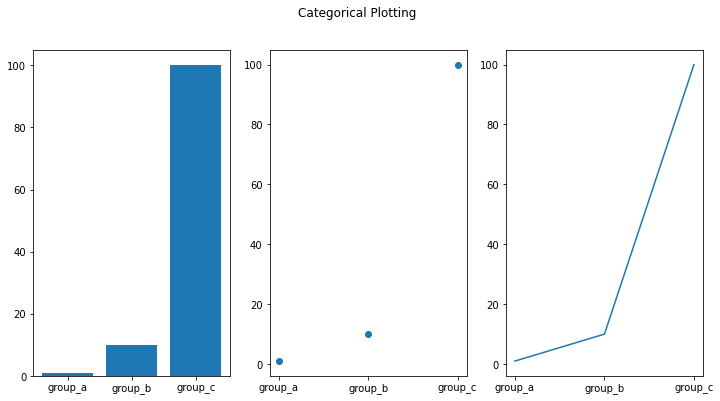

In [12]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
# NEW COMMAND!
plot.figure(1, figsize=(12, 6))
#
plot.subplot(131)
plot.bar(names, values)
#
plot.subplot(132)
plot.scatter(names, values)
#
plot.subplot(133)
plot.plot(names, values)
#
plot.suptitle('Categorical Plotting')
#
plot.show()
plot.close()

#### Figures
In the example above, we created a matplotlib [`Figure`][1]. Please use the option `figsize=(9,6)`, or you choise of width and height, to increase the size of the graphs so they are more legible

#### When to use `axes` commands

The `matplotlib.pyplot` `Figure` object contains many parts, including `axes`. These axes are what actually do the plotting, and many examples you will see on the internet use them. This requires managing variables of the axis data. We will try to avoid this.

[1]: https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure

In [13]:
fig = plot.figure(figsize=(9,5.6))
type(fig)

matplotlib.figure.Figure

<Figure size 648x403.2 with 0 Axes>

In [14]:
plot.close()

#### Controlling line properties


Lines have many attributes that you can set: linewidth, dash style, etc. 

You can look up the available [`matplotlib.lines.Line2D`][1] properties.

[1]: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html

#### Working with multiple figures and axes

`matplotlib.pyplot` has the concept of the current figure and the current axes.  All plotting commands apply to the
current axes.  Normally, you don't have to worry about keeping track of what the current axes are, because it is all taken care of behind the scenes.  Below is a script to create two subplots.

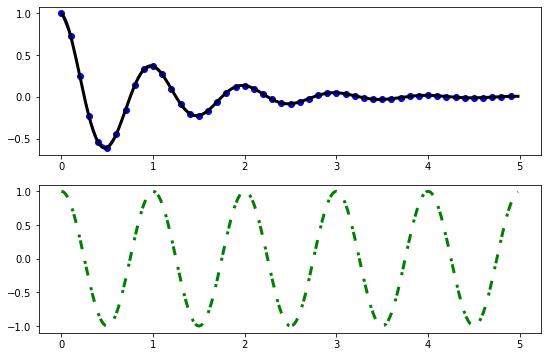

In [15]:
def f(t):
    return numpy.exp(-t) * numpy.cos(2*numpy.pi*t)

t1 = numpy.arange(0.0, 5.0, 0.1)
t2 = numpy.arange(0.0, 5.0, 0.02)

plot.figure(1, figsize=(9, 6))

plot.subplot(211)
plot.plot(t1, f(t1), color='b', marker='o')
plot.plot(t2, f(t2), color='k', linewidth=3)

plot.subplot(212)
plot.plot(t2, numpy.cos(2*numpy.pi*t2), color='g', dashes=(3,4,1,1), linewidth=3)

plot.show()
plot.close()

#### Working with text

The `matplotlib.pyplot.text` command can be used to add text in an arbitrary location, and the `matplotlib.pyplot.xlabel`, `matplotlib.pyplot.ylabel` and `matplotlib.pyplot.title` are used to add text in the indicated locations. Just as with with lines above, you can customize the properties by passing keyword arguments.

The `matplotlib.pyplot` accepts TeX equation expressions in any text expression For example to write the expression $\sigma_i=15$ in the title, you can write a TeX expression surrounded by dollar signs:
```python
    plot.title(r'$\sigma_i=15$')
```
The `r` preceding the title string is important -- it signifies that the string is a *raw* string and not to treat backslashes as python escapes.

#### Histograms

The `matplotlib.pyplot.hist` function automatically generates histograms and returns the bin counts or probabilities:

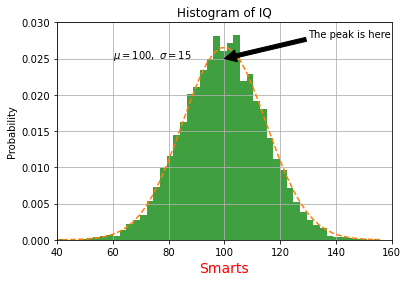

In [16]:
mu, sigma = 100, 15
x = mu + sigma * numpy.random.randn(10000)

# the histogram of the data
n, bins, patches = plot.hist(x, 50, density=1, facecolor='g', alpha=0.75)
# add a 'best fit' line
y = ((1 / (numpy.sqrt(2 * numpy.pi) * sigma)) * numpy.exp(-0.5 * (1 / sigma * (bins - mu))**2))

plot.figure(1,figsize=(9,6))
plot.xlabel('Smarts', fontsize=14, color='red')
plot.ylabel('Probability')
plot.title('Histogram of IQ')
plot.text(60, .025, r'$\mu=100,\ \sigma=15$')
plot.axis([40, 160, 0, 0.03])
plot.grid(True)
plot.annotate('The peak is here', xy=(100, 0.025), xytext=(130, 0.028),
              arrowprops=dict(facecolor='black'))
plot.plot(bins,y,'--')
plot.show()
plot.close()

#### Logarithmic and other nonlinear axes

`matplotlib.pyplot` supports not only linear axis scales, but also
logarithmic and logit scales. This is commonly used if data spans many orders
of magnitude.

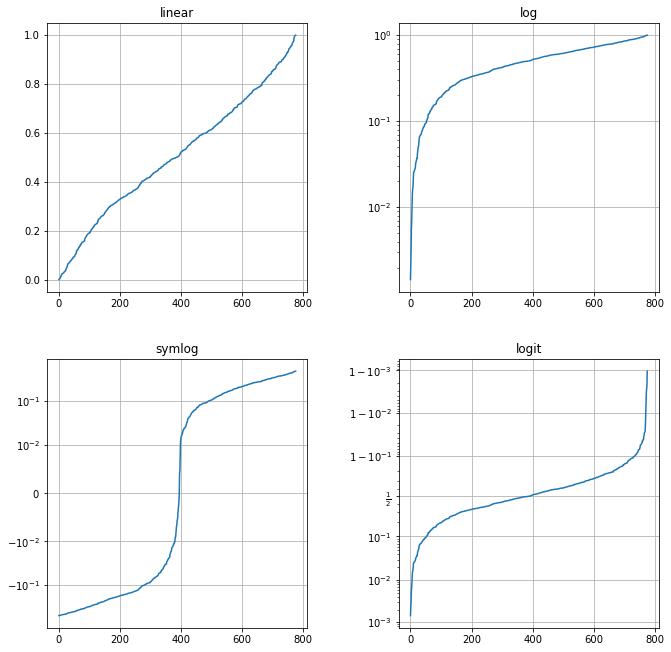

In [17]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
numpy.random.seed(10101)

# make up some data in the interval ]0, 1[
y = numpy.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = numpy.arange(len(y))

# plot with various axes scales
plot.figure(1,figsize=(10,10))

# linear
plot.subplot(221)
plot.plot(x, y)
plot.yscale('linear')
plot.title('linear')
plot.grid(True)


# log
plot.subplot(222)
plot.plot(x, y)
plot.yscale('log')
plot.title('log')
plot.grid(True)


# symmetric logonly
plot.subplot(223)
plot.plot(x, y - y.mean())
plot.yscale('symlog', linthresh=0.01)
plot.title('symlog')
plot.grid(True)

# logit
plot.subplot(224)
plot.plot(x, y)
plot.yscale('logit')
plot.title('logit')
plot.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plot.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plot.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plot.show()
plot.close()

#### Built-in styles

There are a number of pre-defined styles you can use to improve the look of your plots.

<div class="alert alert-block alert-info">
<b>Be careful:</b> Although these styles are nice, they are not perfectly constructed, and swtiching between them many times can confuse the overall style you are looking for.
</div>

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


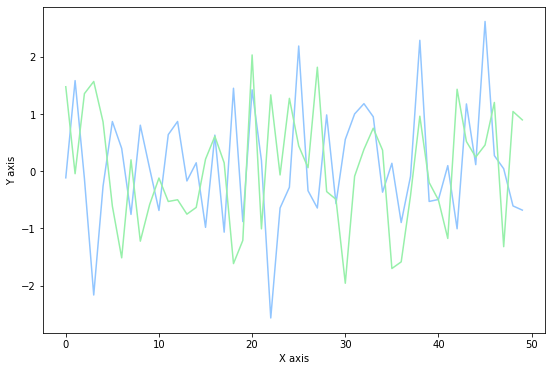

In [18]:
print(plot.style.available)
plot.figure(figsize=(9,6))
plot.style.use('seaborn-pastel')
data = numpy.random.randn(50)
plot.plot(data,'-')
data = numpy.random.randn(50)
plot.plot(data,'-')
plot.xlabel('X axis')
plot.ylabel('Y axis')
plot.show()
plot.close()

#### Working with data files

Much of the data you will want to plot will be made within your program as you calculate things. But to visualize data from other sources, we first need to read the data from data files.

Supposed there is a file with a column of text:
```text
21.71
23.57
34.58
12.57
...
```
If the output of the `file` bash command shows that this file is an ASCII text file, then you can use `numpy.loadtxt` to load the data into an array. If there are two columns of data, you may need to use slicing, or the unpack option of `numpy.loadtxt`.

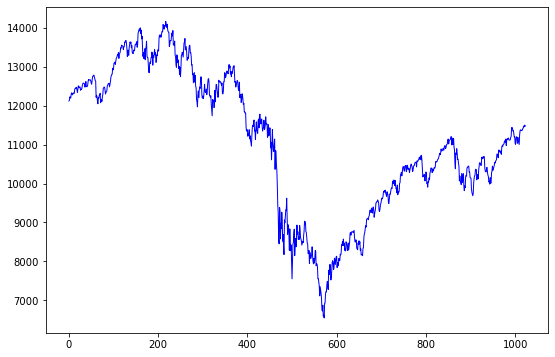

In [19]:
d=numpy.loadtxt("dow.txt", float)
plot.figure(figsize=(9,6))
plot.plot(d,'b-',linewidth=1)
plot.show()
plot.close()

The shape of the data array is : (3143, 2)
The total amount of the data in the array is 6286 data points


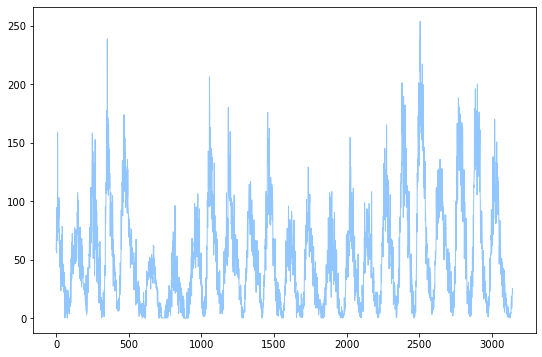

In [20]:
d=numpy.loadtxt("sunspots.txt", float)
print(f"The shape of the data array is : {d.shape}")
print(f"The total amount of the data in the array is {d.size} data points")
x = d[:,0]
y = d[:,1]

plot.figure(figsize=(9,6))
plot.plot(x,y,linewidth=1)
plot.show()
plot.close()

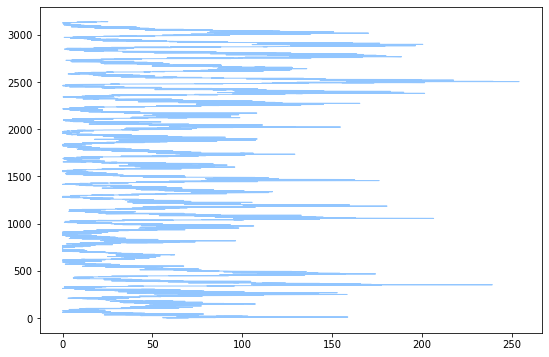

In [21]:
plot.figure(figsize=(9,6))
plot.plot(d[:,1],d[:,0],linewidth=1)
plot.show()
plot.close()